In [1]:
pip install pandas matplotlib seaborn

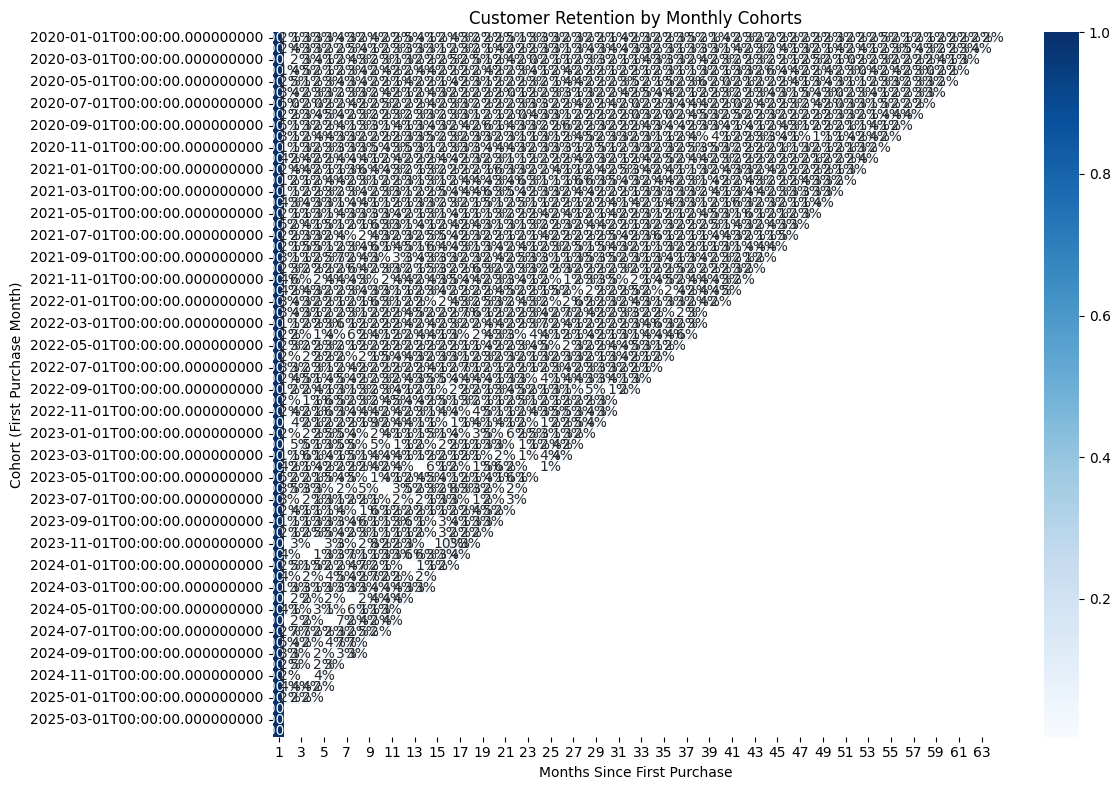

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data
orders_df = pd.read_csv('customer_orders.csv')

# Convert order_date to datetime
orders_df['order_date'] = pd.to_datetime(orders_df['order_date'])

# Create cohort based on first order month
orders_df['order_month'] = orders_df['order_date'].dt.to_period('M').dt.to_timestamp()
cohort_map = orders_df.groupby('customer_id')['order_month'].min()
orders_df['cohort_month'] = orders_df['customer_id'].map(cohort_map)

# Calculate cohort index (months since first purchase)
orders_df['cohort_index'] = ((orders_df['order_month'].dt.year - orders_df['cohort_month'].dt.year) * 12 +
                             (orders_df['order_month'].dt.month - orders_df['cohort_month'].dt.month) + 1)

# Count unique customers per cohort
cohort_data = orders_df.groupby(['cohort_month', 'cohort_index'])['customer_id'].nunique().reset_index()
cohort_pivot = cohort_data.pivot(index='cohort_month', columns='cohort_index', values='customer_id')

# Normalize to get retention rate
cohort_sizes = cohort_pivot.iloc[:, 0]
retention = cohort_pivot.divide(cohort_sizes, axis=0).round(3)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(retention, annot=True, fmt=".0%", cmap="Blues")
plt.title("Customer Retention by Monthly Cohorts")
plt.xlabel("Months Since First Purchase")
plt.ylabel("Cohort (First Purchase Month)")
plt.tight_layout()

# Save the heatmap
plt.savefig("customer_retention_heatmap.png")
plt.show()
